In [1]:
from TMSAnalysis.StruckAnalysisConfiguration import StruckAnalysisConfiguration
from TMSAnalysis.WaveformAnalysis import Waveform
from matplotlib.patches import Rectangle
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import os, glob, itertools
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 15

## Estimation of the size of the electron cloud in the z direction

In [5]:
D_L = 25.0 #cm^2/s
t_d = 77.0/1.e6 #s
v_d = 14.0/t_d #cm/s
two_sigma = 2*np.sqrt(2*D_L*t_d)
time_spread = 2*two_sigma/v_d
time_spread_us = time_spread*1.e6
print('99% of the charge cloud collected in {:.1f}us'.format(time_spread_us))

99% of the charge cloud collected in 1.4us


In [6]:
analysis_config = StruckAnalysisConfiguration.StruckAnalysisConfiguration()
parameters = '20200916_RnPoAlphaEffTest'
analysis_config.GetRunParametersFromFile('/g/g90/jacopod/software/TMSAnalysis/config/30th/Run_Parameters_Run30.xlsx',
                                         parameters)
analysis_config.GetChannelMapFromFile('/g/g90/jacopod/software/TMSAnalysis/config/30th/Channel_Map_Run30.xlsx',
                                         parameters)
sampling_time = analysis_config.run_parameters['Sampling Period [ns]']/1.e3
trigger_time = analysis_config.run_parameters['Pretrigger Length [samples]']
path_to_reduced = '/p/lustre1/jacopod/30th/selected_dataset/'
!ls $path_to_reduced

alpha_rich_2000ns.p	       bipo_rich_500ns_improved_cut
alpha_rich_500ns_improved_cut  bipo_rich_500ns_improved.p
alpha_rich_500ns_improved.p    bipo_rich_500ns.p
alpha_rich_500ns.p	       README
bipo_rich_500ns_cut


In [7]:
df = pd.read_pickle(path_to_reduced + 'bipo_rich_500ns_improved.p')
DriftTime = (df['TimeOfMaxChannel'] - trigger_time)*sampling_time
df = df[DriftTime<75]
DriftTime = DriftTime[DriftTime<75]
df.shape

(50610, 410)

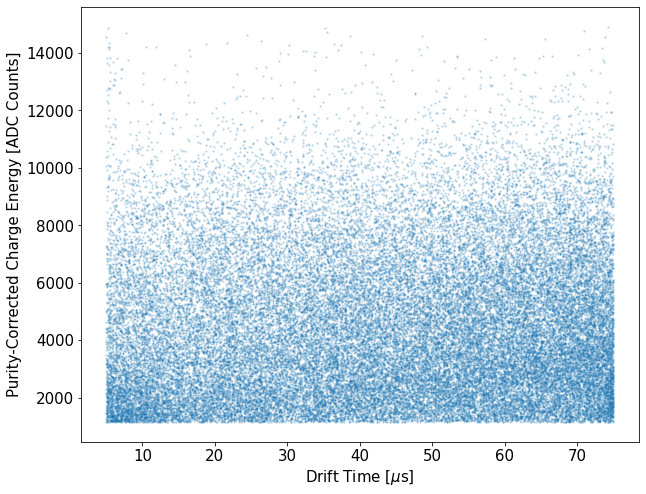

In [8]:
plt.scatter(DriftTime, df['Purity-Corrected Charge Energy'], s=2, alpha=0.2)
plt.xlabel('Drift Time [$\mu$s]')
plt.ylabel('Purity-Corrected Charge Energy [ADC Counts]')
plt.show()

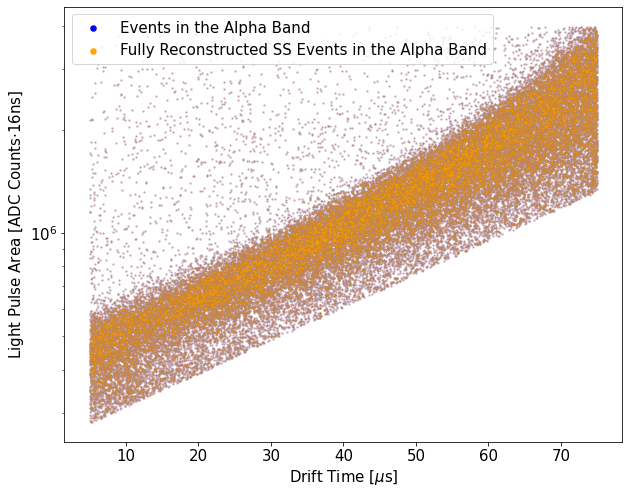

In [9]:
mask_SS = df['NumberOfClusters'] >0
#alpha_band_charge = (df['Purity-Corrected Charge Energy']>600-200*np.exp(-DriftTime/8)) &\
#(df['Purity-Corrected Charge Energy']<850-200*np.exp(-DriftTime/8))
#alpha_band_light = (df['TotalSiPMEnergy']>180000*np.exp(DriftTime/36))
alpha_band = np.ones(df.shape[0])#alpha_band_charge & alpha_band_light & (DriftTime<77)
alpha_band_SS = alpha_band & mask_SS
alpha_band_SS_fully_recon = alpha_band_SS #& df['Number3DClusters'] == 1
#x = np.linspace(0,80,200)
#plt.scatter(DriftTime[mask_SS], df['Purity-Corrected Charge Energy'][mask_SS], s=2, alpha=0.2)
#plt.plot(x,600-200*np.exp(-x/8),c='red')
#plt.plot(x,850-200*np.exp(-x/8),c='red')
#plt.xlabel('Drift Time [$\mu$s]')
#plt.ylabel('Purity-Corrected Charge Energy [ADC Counts]')
#plt.show()
plt.scatter(DriftTime,df['TotalSiPMEnergy'], s=2, alpha=0.2,c='blue',\
            label = 'Events in the Alpha Band')
plt.scatter(DriftTime[mask_SS & df['Number3DClusters'] == 1],\
            df['TotalSiPMEnergy'][mask_SS & df['Number3DClusters'] == 1], s=2, alpha=0.2,c='orange',\
            label = 'Fully Reconstructed SS Events in the Alpha Band')
#plt.plot(x,180000*np.exp(x/36),c='red')
#plt.plot(x,900000000/(np.square(78-x)+300),c='red',label = r'$\frac{1}{r^2}$ attenuation')
plt.yscale('log')
lgnd = plt.legend(loc="upper left")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
#lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)
#lgnd.legendHandles[2].set_alpha(1)
#plt.ylim(20000,6000000)
plt.xlabel('Drift Time [$\mu$s]')
plt.ylabel('Light Pulse Area [ADC Counts$\cdot$16ns]')
plt.show()

In [10]:
for k in df.keys():
    print(k)

ChannelPositions
ChannelTypes
Cluster Drift Time
Cluster Energies
Cluster X-Pos
Cluster Y-Pos
Cluster Z-Pos
Event
File
IsFull3D
NumSiPMChannelsHit
NumTileChannelsHit
NumXTileChannelsHit
NumYTileChannelsHit
Number3DClusters
NumberOfClusters
SiPM 1-1 Baseline
SiPM 1-1 Baseline RMS
SiPM 1-1 Induced Charge
SiPM 1-1 Pulse Area
SiPM 1-1 Pulse Height
SiPM 1-1 Pulse Time
SiPM 1-1 T10
SiPM 1-1 T20
SiPM 1-1 T5
SiPM 1-1 T80
SiPM 1-1 T90
SiPM 1-2 Baseline
SiPM 1-2 Baseline RMS
SiPM 1-2 Induced Charge
SiPM 1-2 Pulse Area
SiPM 1-2 Pulse Height
SiPM 1-2 Pulse Time
SiPM 1-2 T10
SiPM 1-2 T20
SiPM 1-2 T5
SiPM 1-2 T80
SiPM 1-2 T90
SiPM 1-3 Baseline
SiPM 1-3 Baseline RMS
SiPM 1-3 Induced Charge
SiPM 1-3 Pulse Area
SiPM 1-3 Pulse Height
SiPM 1-3 Pulse Time
SiPM 1-3 T10
SiPM 1-3 T20
SiPM 1-3 T5
SiPM 1-3 T80
SiPM 1-3 T90
SiPM 1-4 Baseline
SiPM 1-4 Baseline RMS
SiPM 1-4 Induced Charge
SiPM 1-4 Pulse Area
SiPM 1-4 Pulse Height
SiPM 1-4 Pulse Time
SiPM 1-4 T10
SiPM 1-4 T20
SiPM 1-4 T5
SiPM 1-4 T80
SiPM 1-4 T90


In [11]:
sc_list = analysis_config.channel_map['ChannelName'][(analysis_config.channel_map['NumDevicesInChannel'] > 2) & (analysis_config.channel_map['ChannelType'] == 'TileStrip')]
mask_sc = np.ones(len(df)).astype(bool)
for ch_name in sc_list:
    mask_sc = np.logical_and((df['TileStrip %s Charge Energy'%ch_name]<2*df['TileStrip %s Baseline RMS'%ch_name]),mask_sc)
print(sc_list)

10    Y1-10
25    X1-12
Name: ChannelName, dtype: object


In [12]:
keys = df.keys()
relative_energy_SS = np.zeros(sum(mask_sc))
for i,ix in enumerate(df[mask_sc].index):
    mx = 0
    for k in keys:
        if ('Charge Energy' in k) and ('TileStrip' in k) and (df[k][ix]>mx):
            mx = df[k][ix]
    relative_energy_SS[i] = mx/df['TotalTileEnergy'][ix]

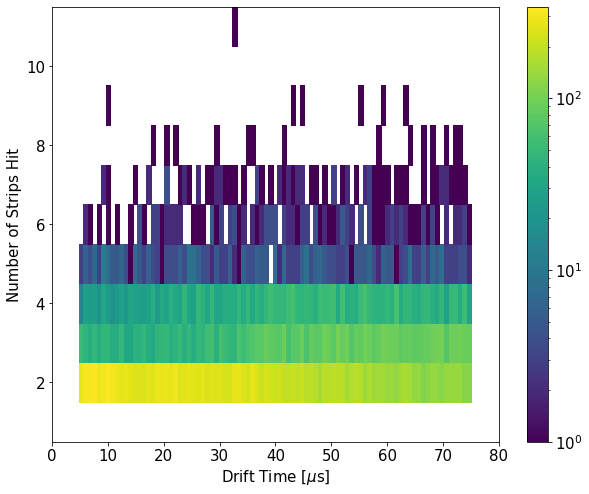

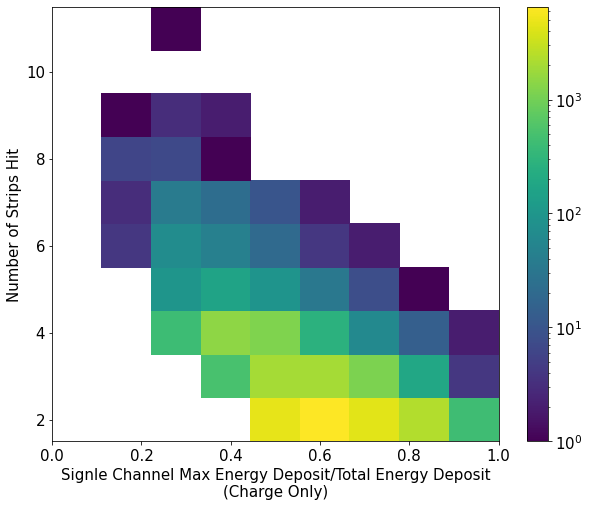

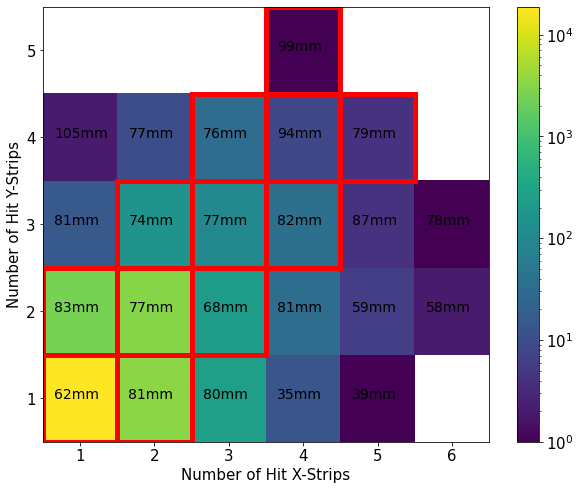

In [13]:
import matplotlib.colors as colors
plot1 = mask_sc
xlim = int(max(df['NumberOfClusters'][plot1]))
#plt.hist2d(df['NumberOfClusters'][plot1],\
#           relative_energy[plot1],bins=[np.linspace(0,xlim,xlim+1)+0.5,np.linspace(0,1,50)],norm=colors.LogNorm())
#plt.colorbar()
#plt.xlabel('Number Of Clusters')
#plt.ylabel('Highest Energy Cluster/Total Energy Deposit\n(Charge Energy)')
#plt.show()
plot3 = mask_sc
plot2 = mask_sc
xlim = int(max(df['NumTileChannelsHit'][plot2]))
plt.hist2d(DriftTime[plot3][(relative_energy_SS>0) & (relative_energy_SS<1)],\
           df['NumTileChannelsHit'][plot3][(relative_energy_SS>0) & (relative_energy_SS<1)],bins=[np.linspace(0,80,100),np.linspace(0,xlim,xlim+1)+0.5],\
           norm=colors.LogNorm())
#plt.ylim(1.5,5.5)
plt.colorbar()
plt.xlabel('Drift Time [$\mu$s]')
plt.ylabel('Number of Strips Hit')
plt.show()
#plt.hist(relative_energy_SS[(relative_energy_SS>0) & (relative_energy_SS<1)],bins=30,log=True)
#plt.xlabel('Signle Channel Max Energy Deposit/Total Energy Deposit\n(Charge Only)')
#plt.show()
plt.hist2d(relative_energy_SS[(relative_energy_SS>0) & (relative_energy_SS<1)],\
           df['NumTileChannelsHit'][mask_sc][(relative_energy_SS>0) & (relative_energy_SS<1)],\
           bins=[np.linspace(0,1,10),np.linspace(1,11,11)+0.5],
           norm=colors.LogNorm())
plt.xlabel('Signle Channel Max Energy Deposit/Total Energy Deposit\n(Charge Only)')
plt.ylabel('Number of Strips Hit')
plt.colorbar()
plt.show()
xlim = int(max(df['NumXTileChannelsHit'][plot3]))
ylim = int(max(df['NumYTileChannelsHit'][plot3]))
xlim = 6
ylim = 6
plt.hist2d(df['NumXTileChannelsHit'][plot3],\
           df['NumYTileChannelsHit'][plot3],bins=[np.linspace(-1,xlim,xlim+2)+0.5,np.linspace(-1,ylim,ylim+2)+0.5],\
           norm=colors.LogNorm())
plt.xlim(0.5,6.5)
plt.ylim(0.5,5.5)
plt.colorbar()
plt.xlabel('Number of Hit X-Strips')
plt.ylabel('Number of Hit Y-Strips')
for x,y in itertools.product(range(xlim+1),range(ylim+1)):
    msk = (df['NumXTileChannelsHit'] == x) & (df['NumYTileChannelsHit'] == y) & plot3
    val = '{:.0f}'.format(np.mean(DriftTime[msk]*analysis_config.run_parameters['Drift Velocity [mm/us]']))
    if val != 'nan':
        plt.text(x-0.35,y,val+'mm',size=14)
        if abs(x-y)<2:
            plt.gca().add_patch(Rectangle((x-0.5, y-0.5), 1, 1, fill=False, ec='red', lw=5))
plt.show()

Stored 'h_bipo_data' (tuple)


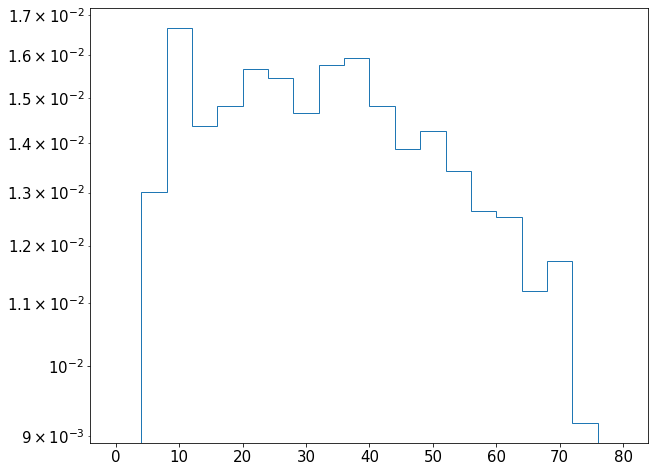

In [14]:
h_bipo_data = plt.hist(DriftTime[mask_sc],bins=20,histtype='step',range=(0,80),density=True)
plt.yscale('log')
%store h_bipo_data

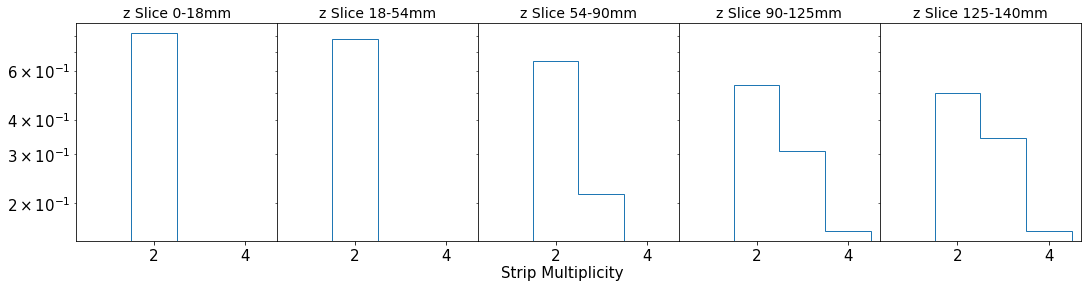

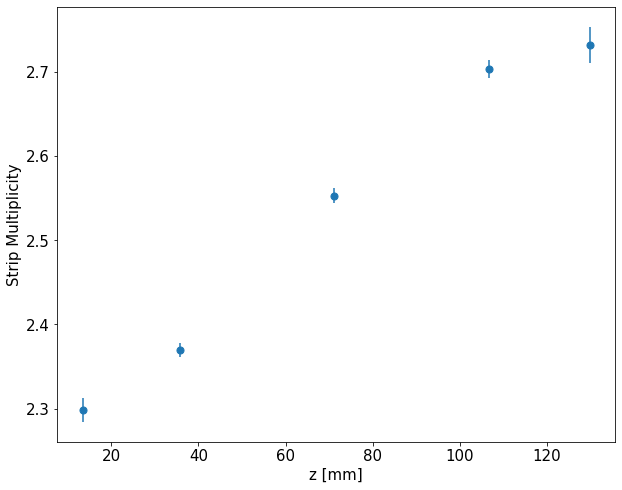

Stored 'hist_export_bipo' (list)
Stored 'val_export_bipo' (list)
Stored 'err_export_bipo' (list)
Stored 'z_err_export_bipo' (list)


In [15]:
min_time = 10
max_time = 70
time_slice_number = 4
drift_velocity = analysis_config.run_parameters['Drift Velocity [mm/us]']
z_slice = np.linspace(min_time,max_time,time_slice_number)*drift_velocity
fig1,ax1 = plt.subplots(1,time_slice_number+1,sharey=True,gridspec_kw={'wspace': 0,'hspace': 0})
z_bin_phys = np.digitize(DriftTime[plot3],z_slice)
z_bin_phys_sc = np.digitize(DriftTime[plot3][mask_sc],z_slice/drift_velocity)
fig1.set_size_inches(18,4)
ax1[0].set_yscale('log')
fig2 = plt.figure(2)
#fig2.set_size_inches(6,5)
hist_export_bipo = []
val_export_bipo = []
err_export_bipo = []
z_err_export_bipo = []
for ds in range(time_slice_number+1):
    if ds == 0:
        title1 = 0
        title2 = z_slice[ds]
    elif ds == time_slice_number:
        title1 = z_slice[ds-1]
        title2 = 140
    else:
        title1 = z_slice[ds-1]
        title2 = z_slice[ds]
    plt.figure(fig1.number)
    ax1[ds].set_title('z Slice {:.0f}-{:.0f}mm'.format(title1,title2), fontsize=14)
    if ds == time_slice_number:
        #ax1[ds].hist(df['NumTileChannelsHit'][plot3][z_bin_phys==ds],bins=[0.5,1.5,2.5,3.5,4.5],color='blue',label='All Channels')
        h_val = ax1[ds].hist(df['NumTileChannelsHit'][plot3][mask_sc][z_bin_phys_sc==ds],\
                     bins=[0.5,1.5,2.5,3.5,4.5],color='C0',label='One Strip Channels',histtype='step',density=True)
        #plt.legend()
    else:
        #ax1[ds].hist(df['NumTileChannelsHit'][plot3][z_bin_phys==ds],bins=[0.5,1.5,2.5,3.5,4.5],color='blue')
        h_val = ax1[ds].hist(df['NumTileChannelsHit'][plot3][mask_sc][z_bin_phys_sc==ds],\
                     bins=[0.5,1.5,2.5,3.5,4.5],color='C0',histtype='step',density=True)
    hist_export_bipo.append(h_val)
    #mean = np.mean(df['NumTileChannelsHit'][plot3][z_bin_phys==ds])
    #std = np.std(df['NumTileChannelsHit'][plot3][z_bin_phys==ds])
    #z_mean = np.mean(DriftTime[plot3][z_bin_phys==ds])
    #z_std = np.std(DriftTime[plot3][z_bin_phys==ds])
    mean_sc = np.mean(df['NumTileChannelsHit'][plot3][mask_sc][z_bin_phys_sc==ds])
    std_sc = np.std(df['NumTileChannelsHit'][plot3][mask_sc][z_bin_phys_sc==ds])/np.sqrt(sum(z_bin_phys_sc==ds))
    z_mean_sc = np.mean(DriftTime[plot3][mask_sc][z_bin_phys_sc==ds])
    z_std_sc = np.std(DriftTime[plot3][mask_sc][z_bin_phys_sc==ds])/np.sqrt(sum(z_bin_phys_sc==ds))
    plt.figure(fig2.number)
    if ds == time_slice_number:
        #plt.scatter(z_mean,mean,c='blue',s=50,label='All Channels')
        #plt.errorbar(z_mean,mean,std,z_std,c='blue')
        plt.scatter(z_mean_sc*drift_velocity,mean_sc,c='C0',s=50,label='One Strip Channels')
        plt.errorbar(z_mean_sc*drift_velocity,mean_sc,std_sc,z_std_sc,c='C0')
        #plt.legend(loc=2)
    else:
        #plt.scatter(z_mean,mean,c='blue',s=50)
        #plt.errorbar(z_mean,mean,std,z_std,c='blue')
        plt.scatter(z_mean_sc*drift_velocity,mean_sc,c='C0',s=50)
        plt.errorbar(z_mean_sc*drift_velocity,mean_sc,std_sc,z_std_sc,c='C0')
    val_export_bipo.append(mean_sc)
    err_export_bipo.append(std_sc)
    z_err_export_bipo.append(z_std_sc)
plt.xlabel('z [mm]')
plt.ylabel('Strip Multiplicity')
fig1.text(0.5, 0, 'Strip Multiplicity', ha='center')
plt.show()
%store hist_export_bipo
%store val_export_bipo
%store err_export_bipo
%store z_err_export_bipo

Stored 'bn' (ndarray)
Stored 'h' (ndarray)


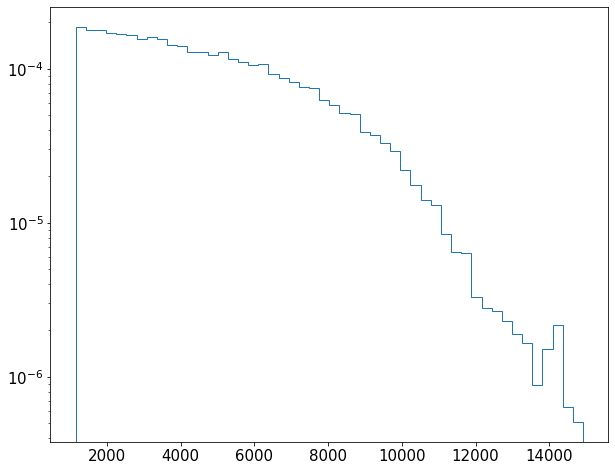

In [16]:
h,bn,_ = plt.hist(df['Purity-Corrected Charge Energy'][mask_sc],bins=50,histtype='step',log=True,density=True)
%store bn
%store h

In [17]:
energy_min = 200
energy_max  = 7000
t_min = 5
t_max = 75
df_ind = df.loc[alpha_band_SS_fully_recon]
DriftTime_ind = DriftTime.loc[alpha_band_SS_fully_recon]

/g/g90/jacopod/uproot/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


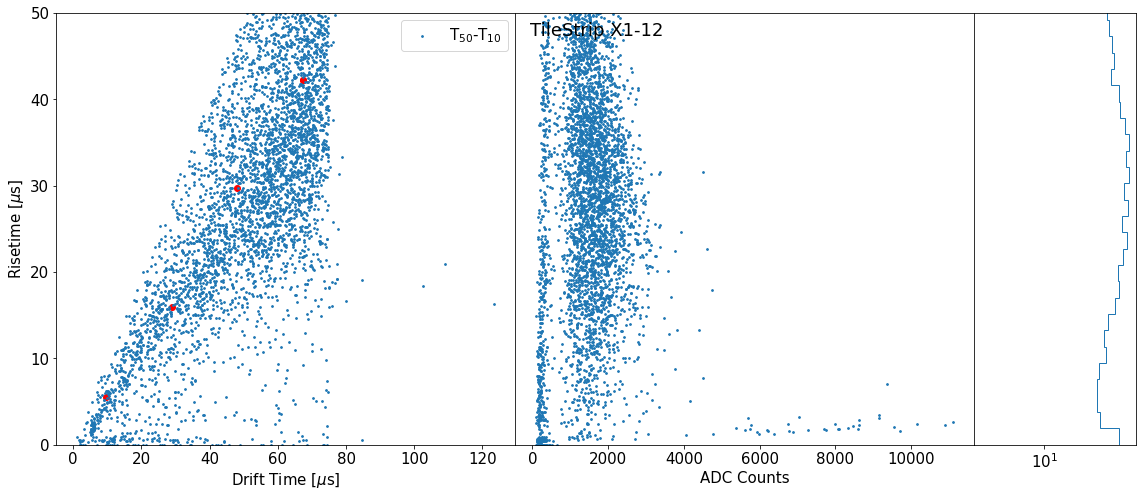

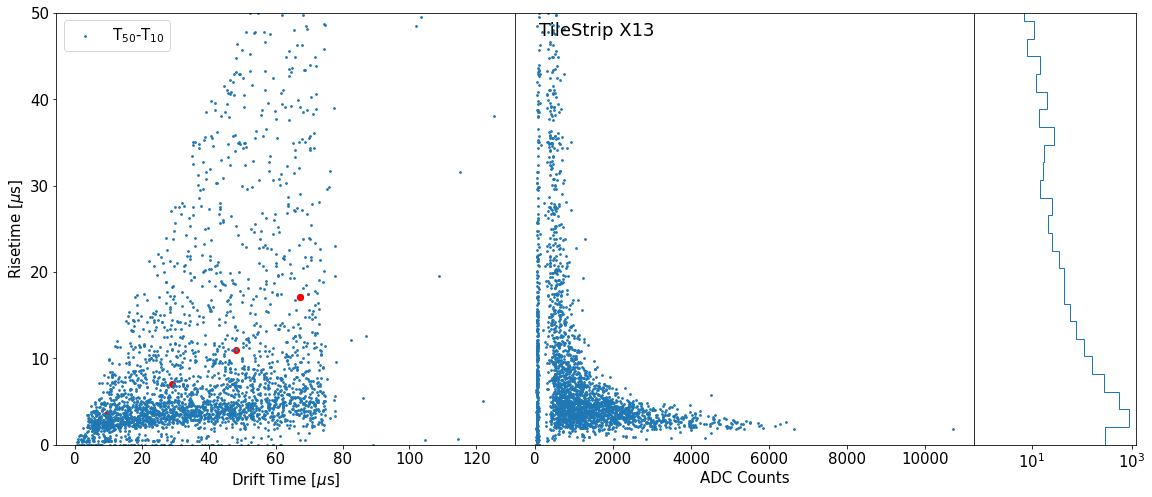

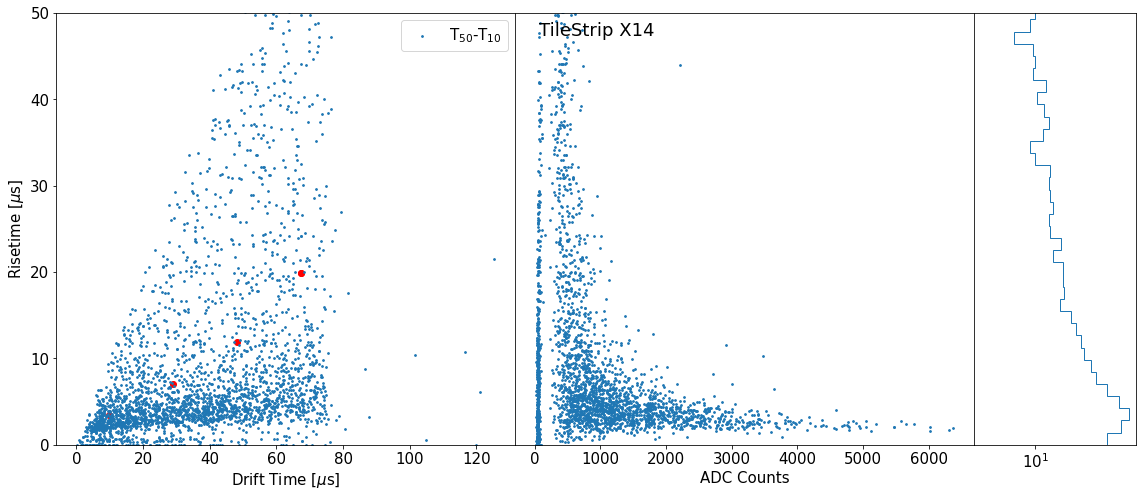

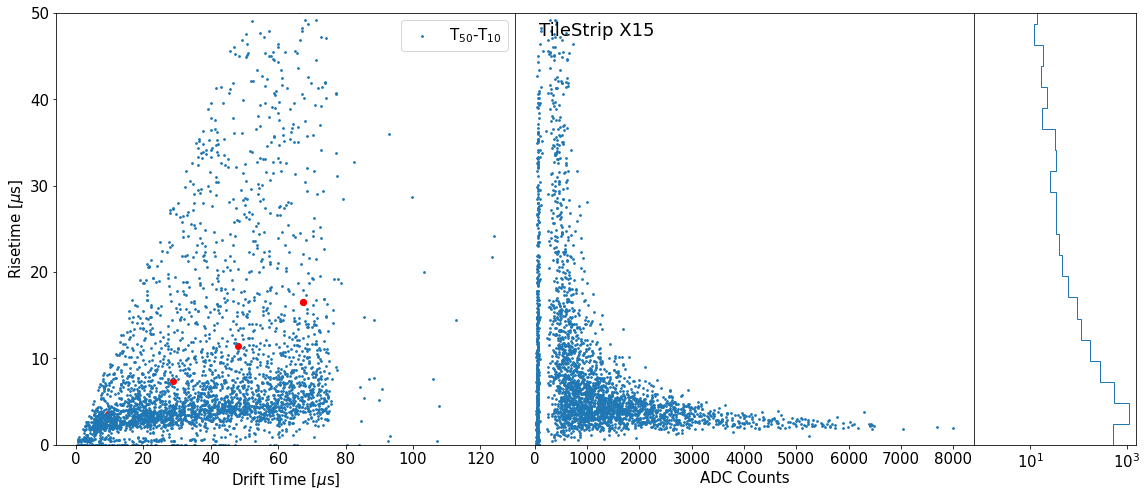

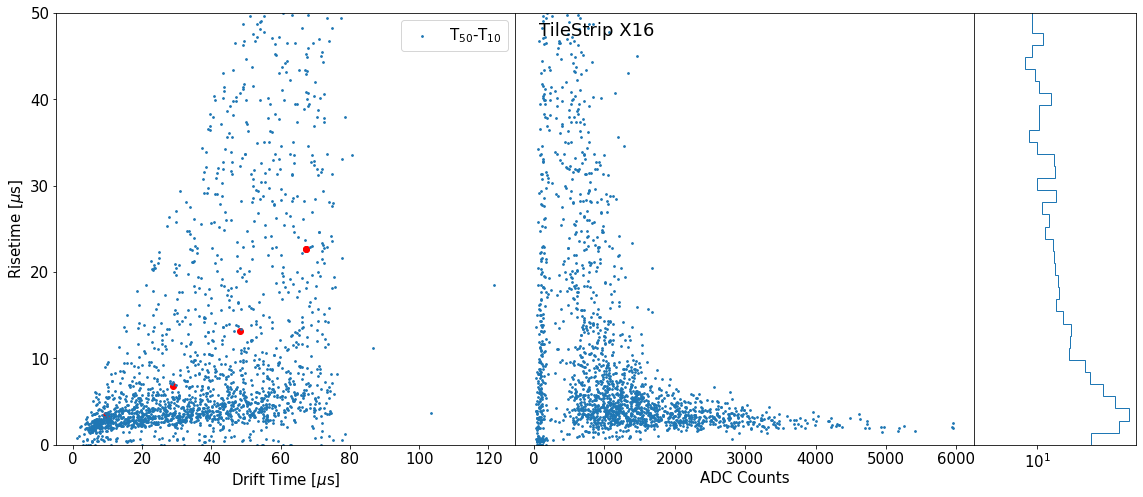

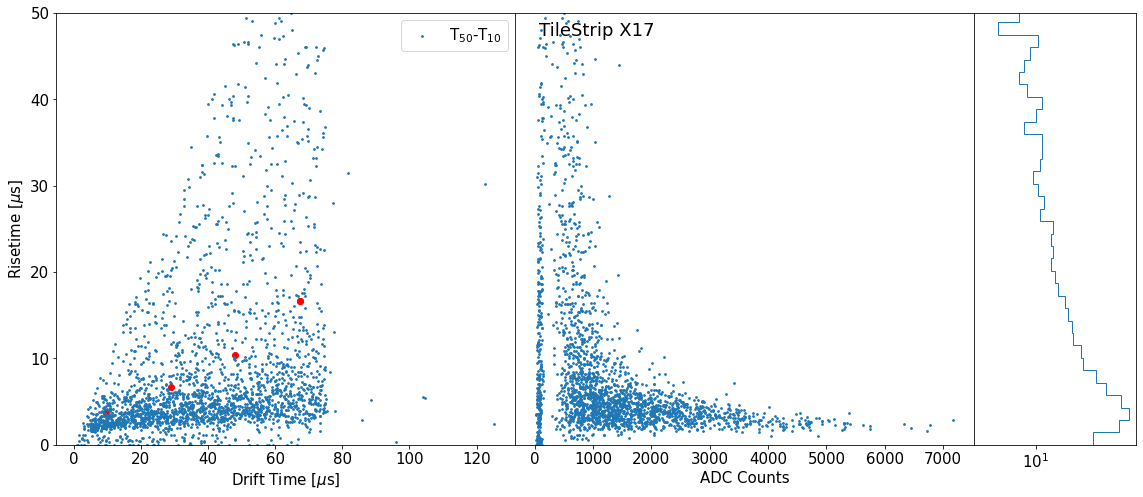

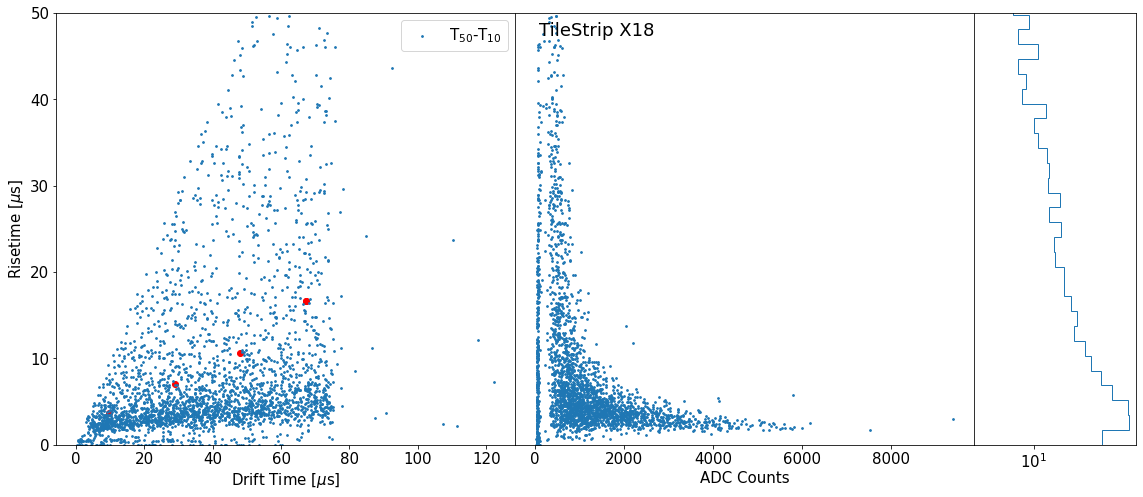

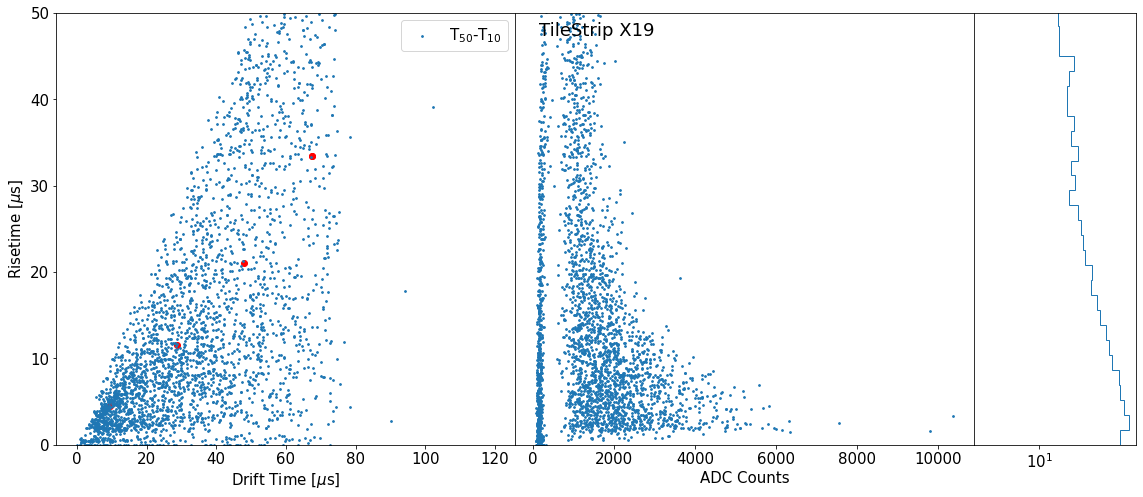

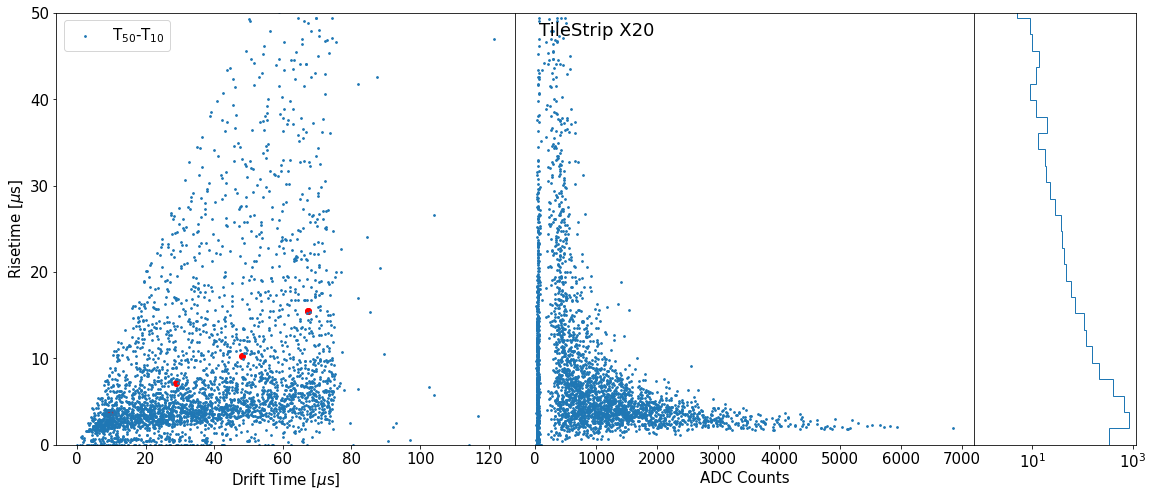

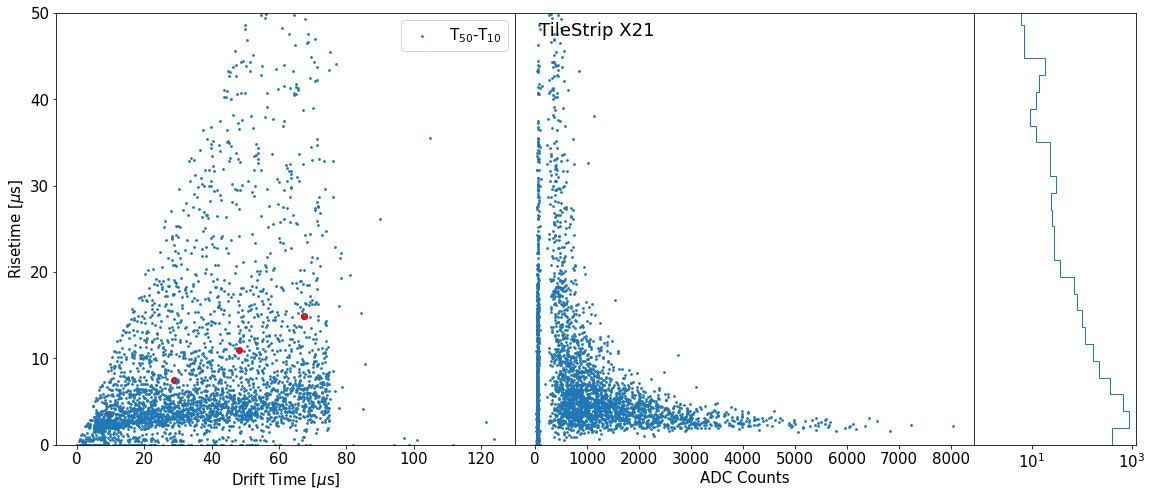

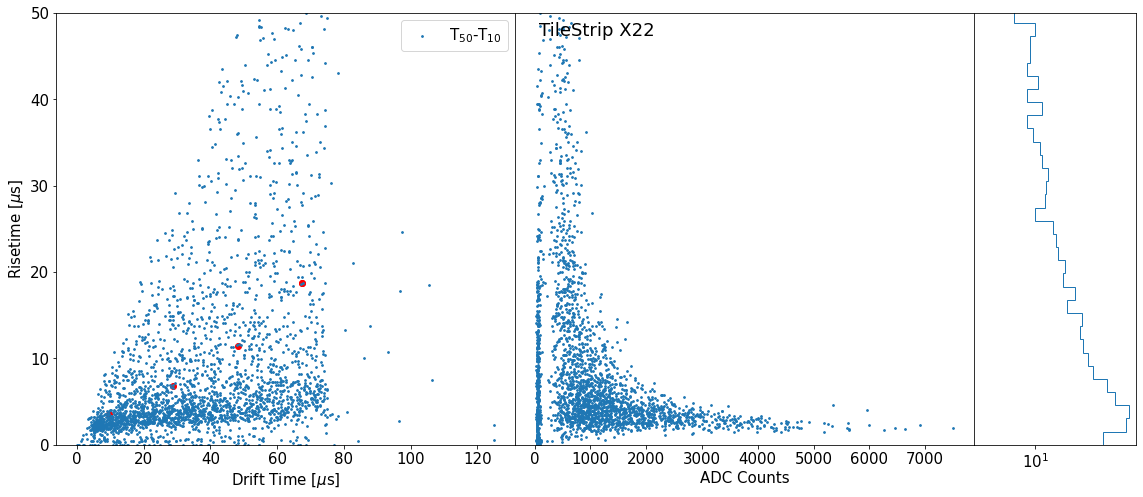

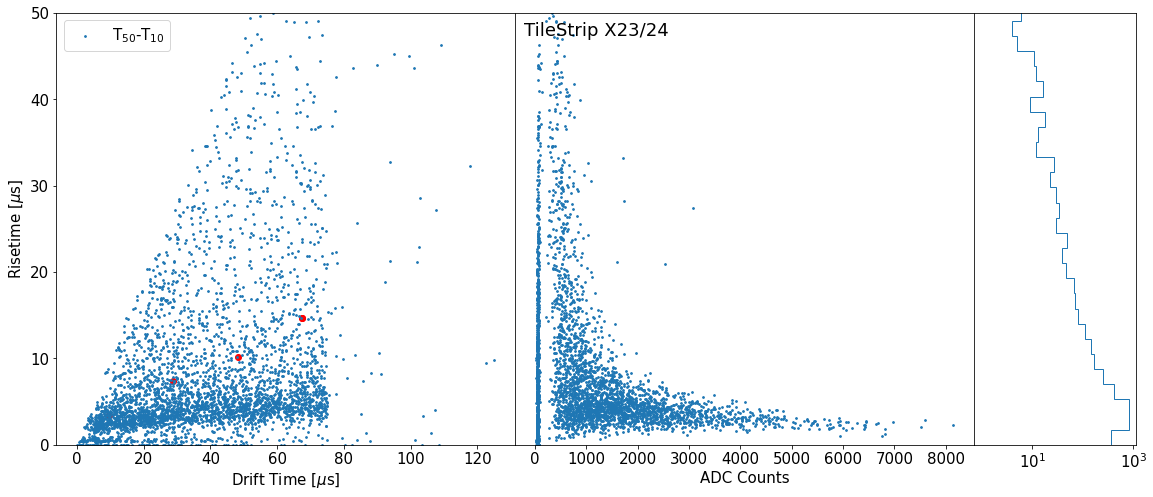

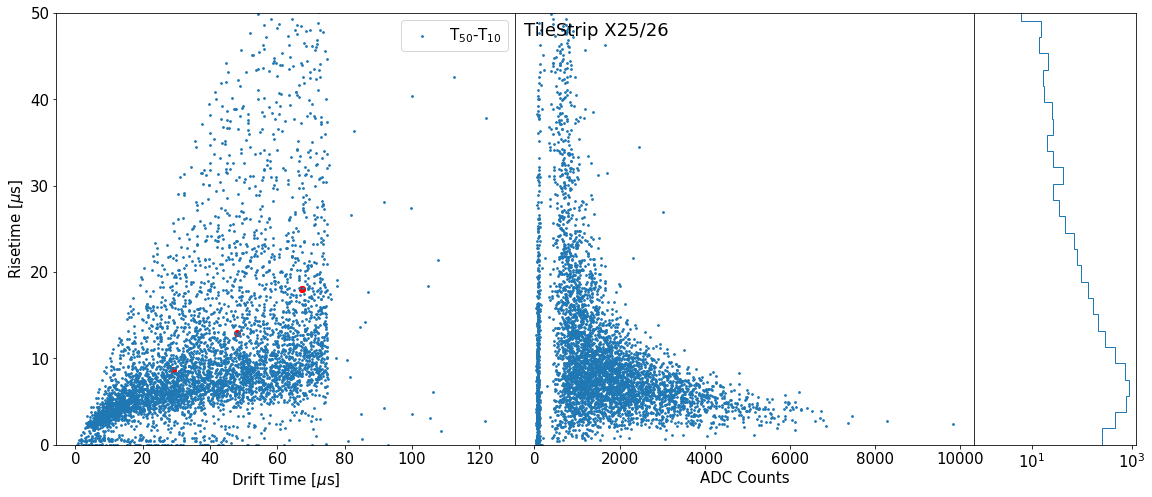

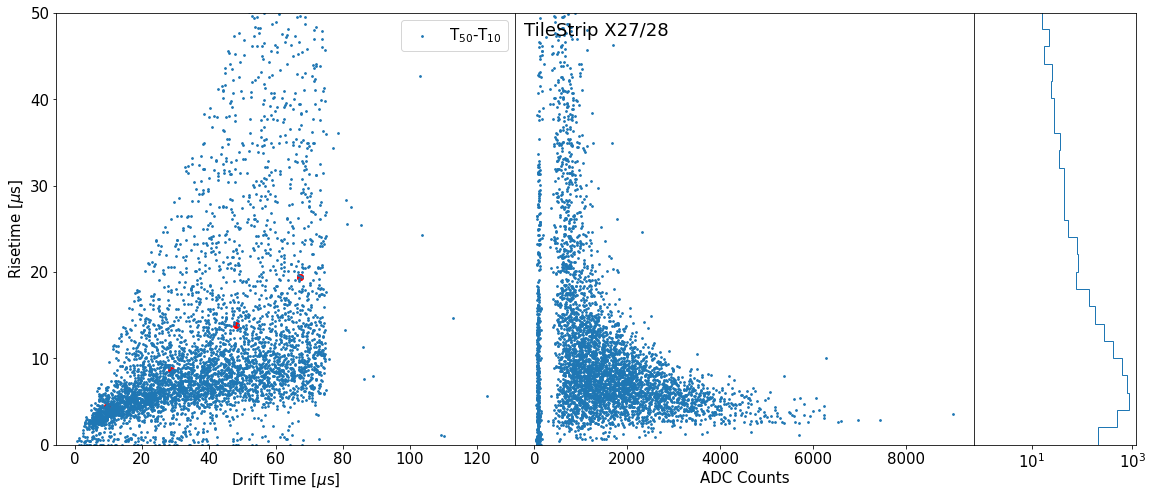

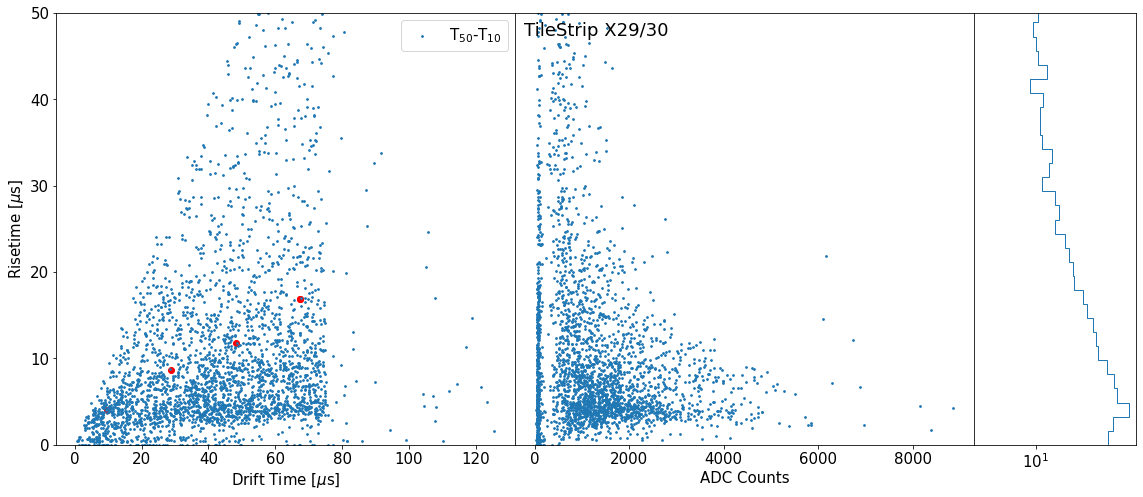

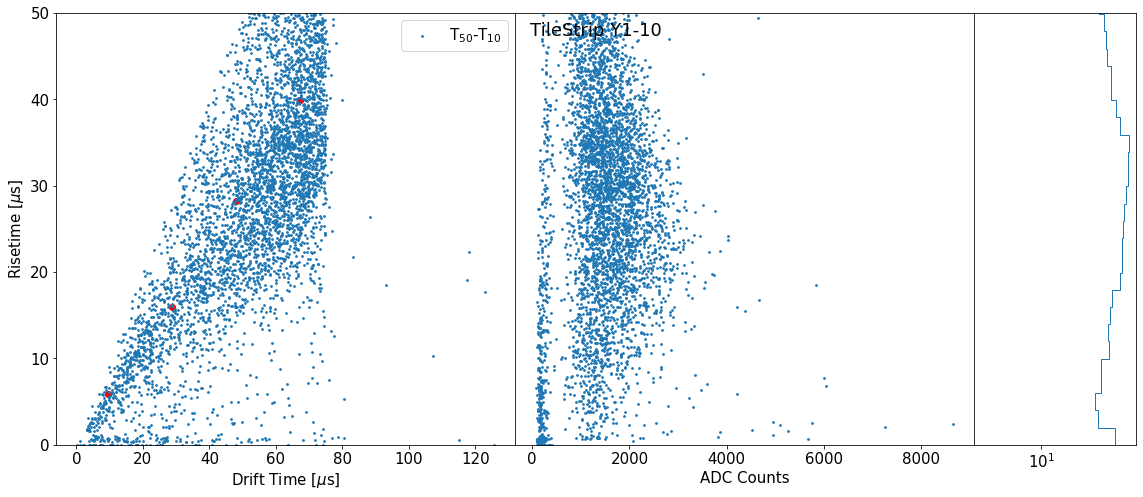

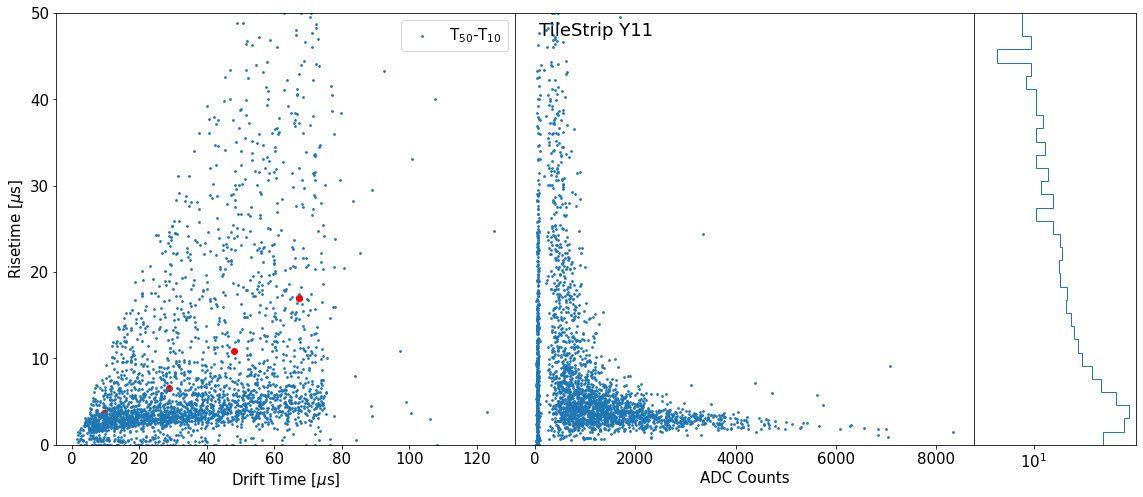

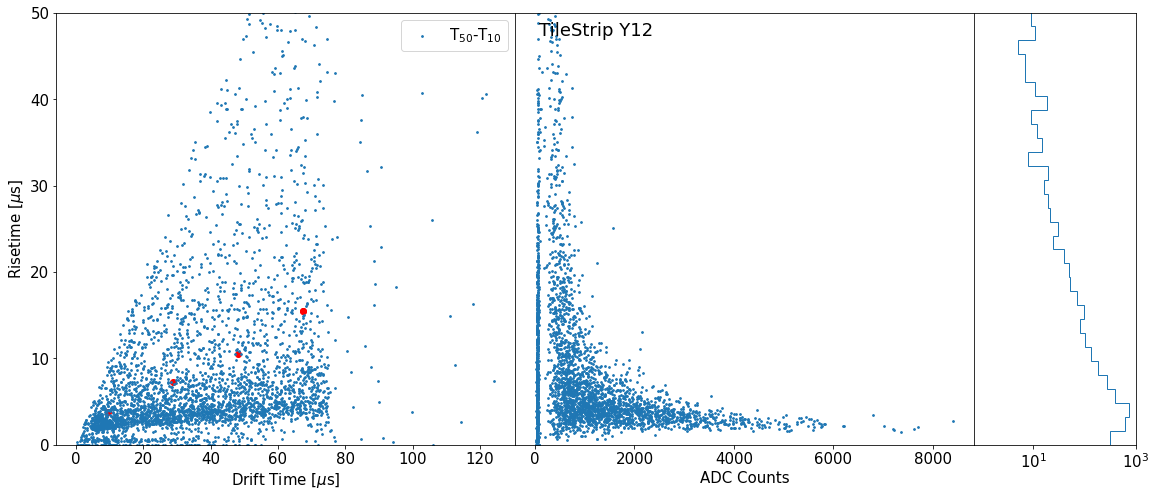

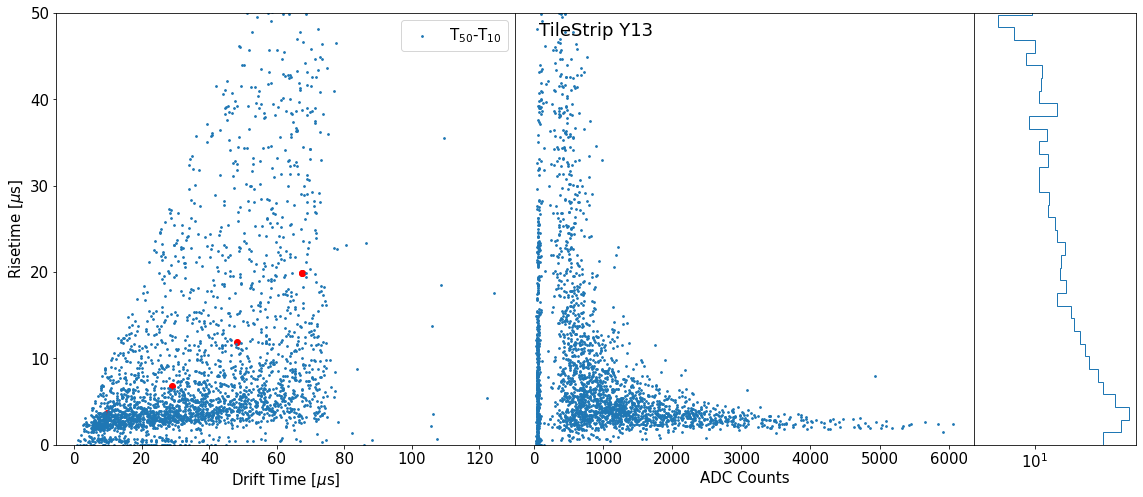

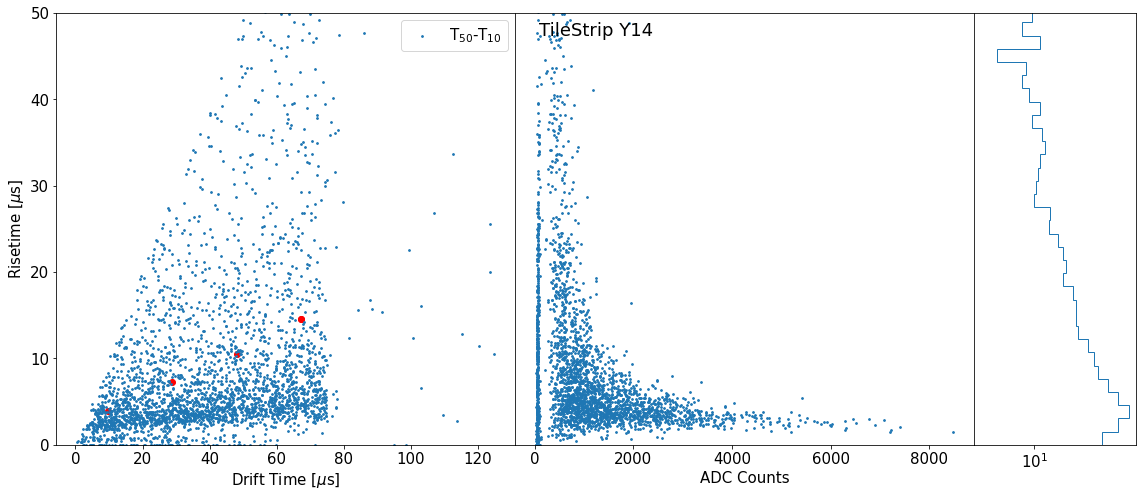

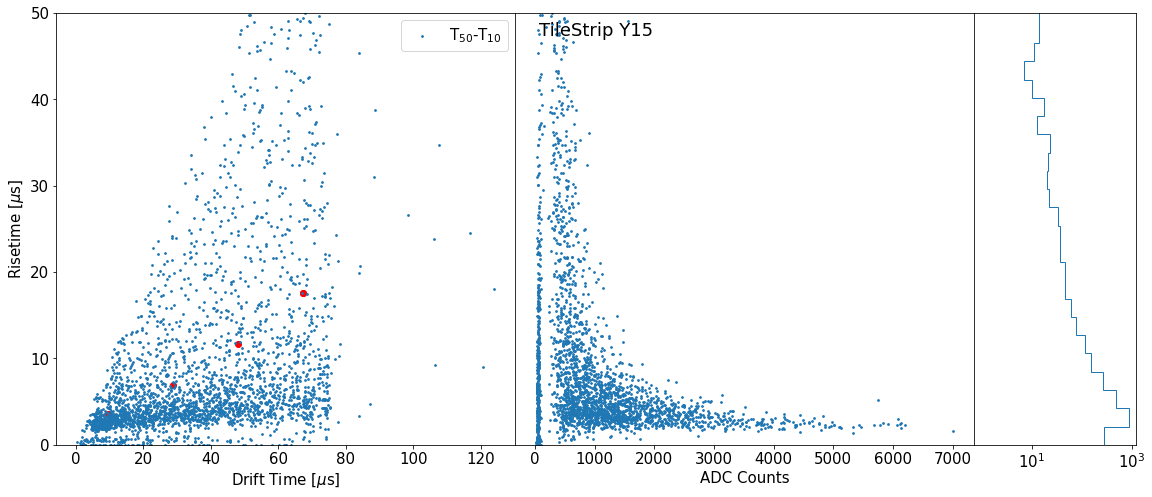

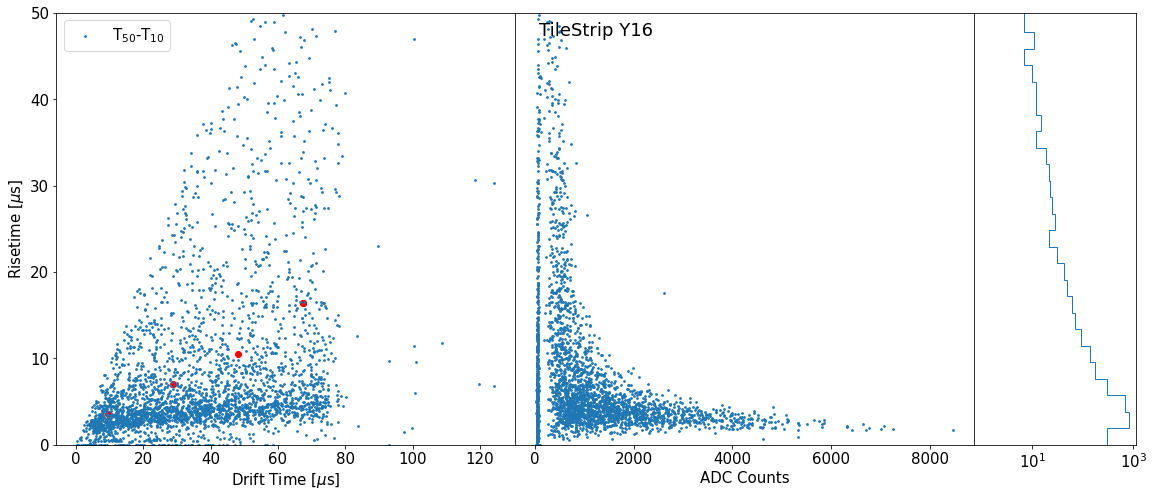

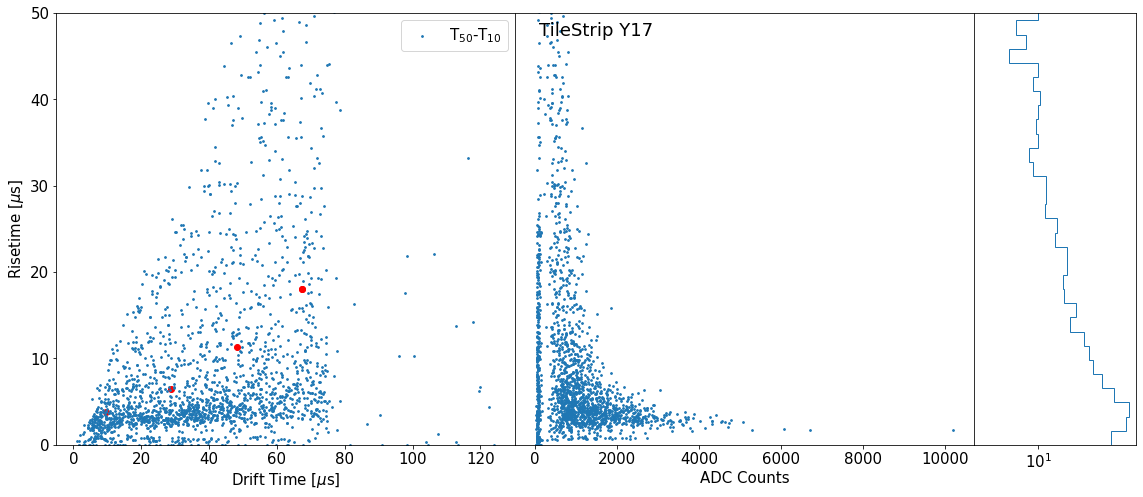

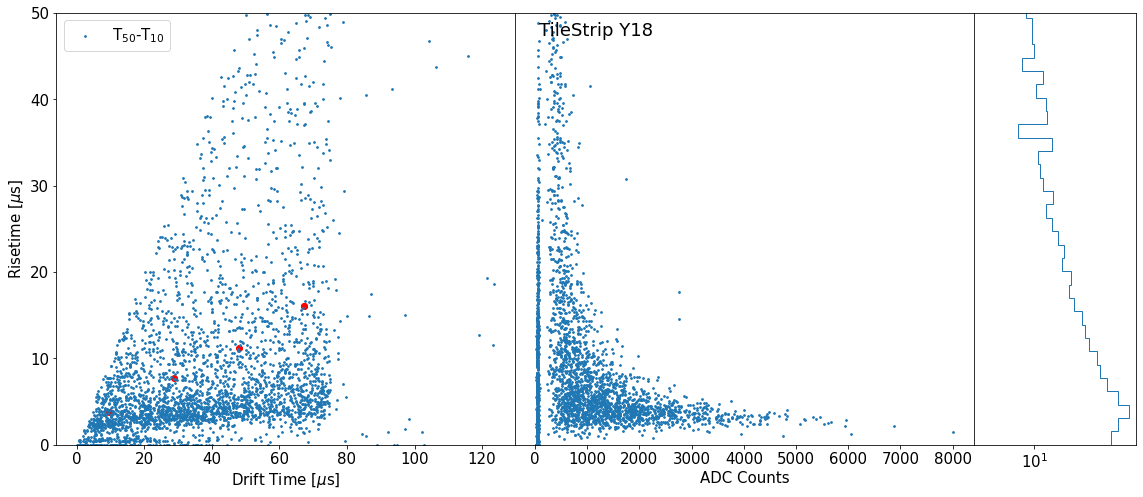

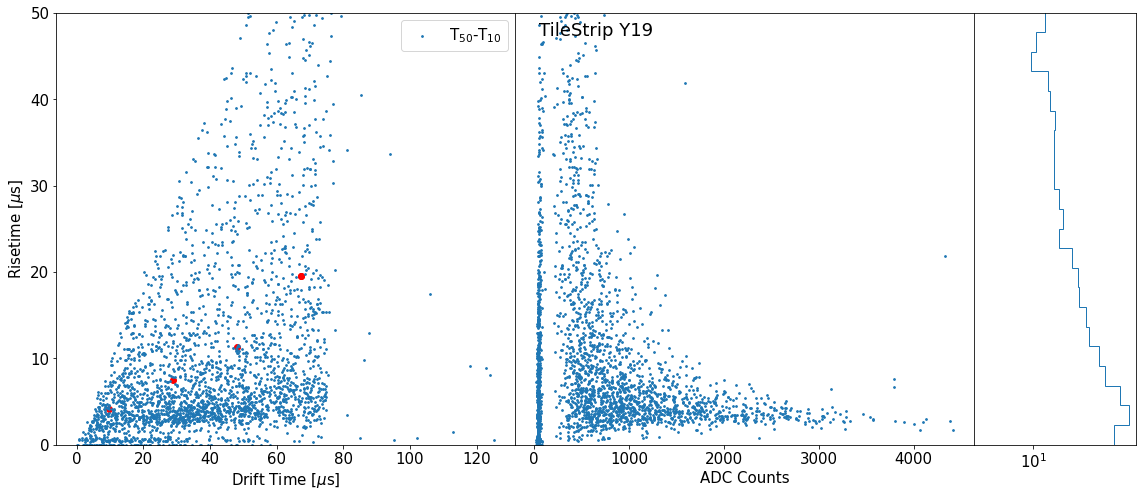

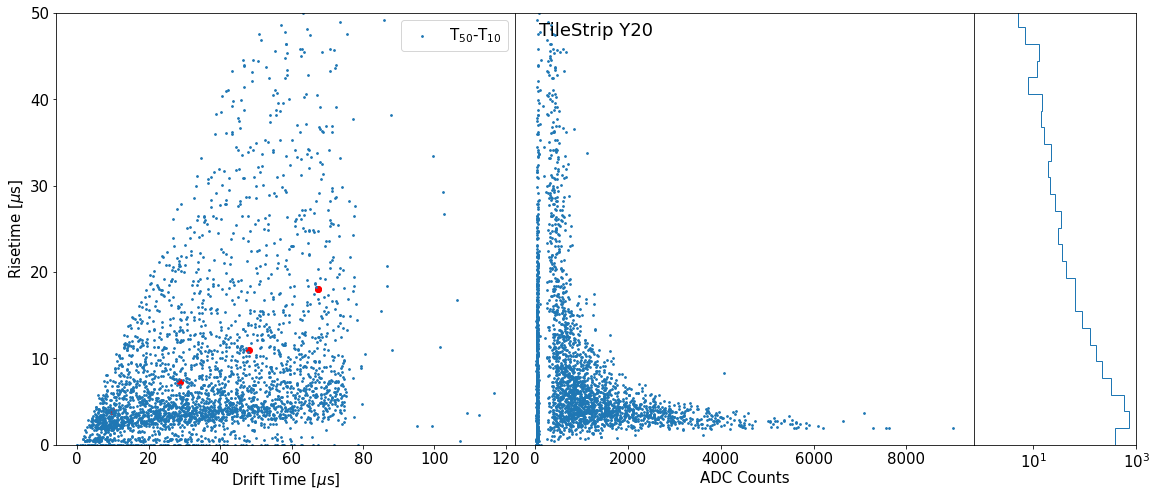

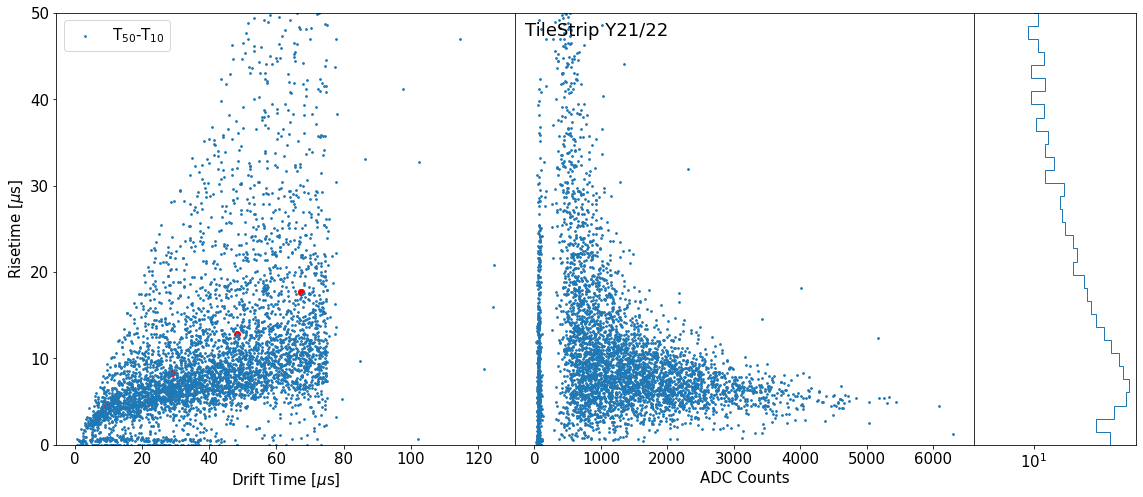

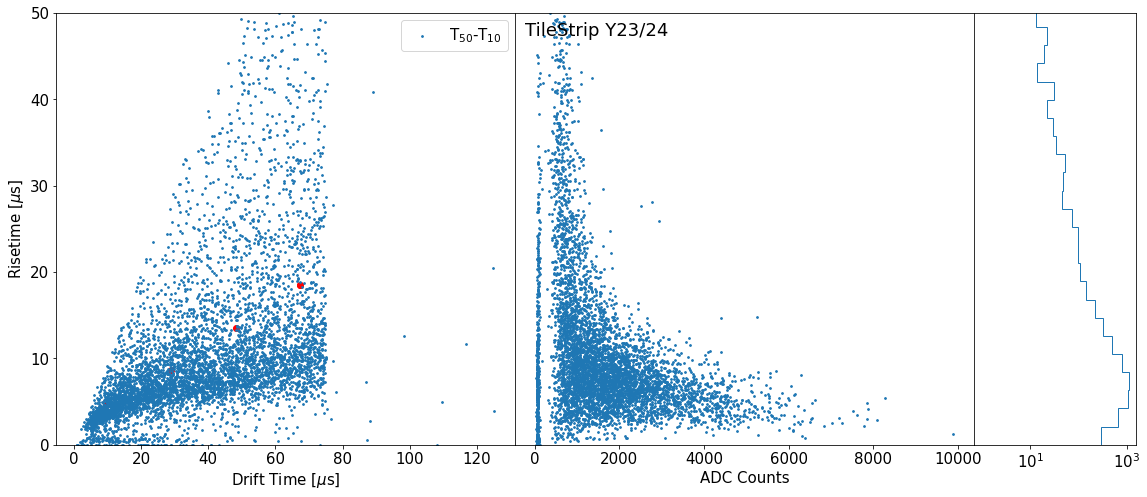

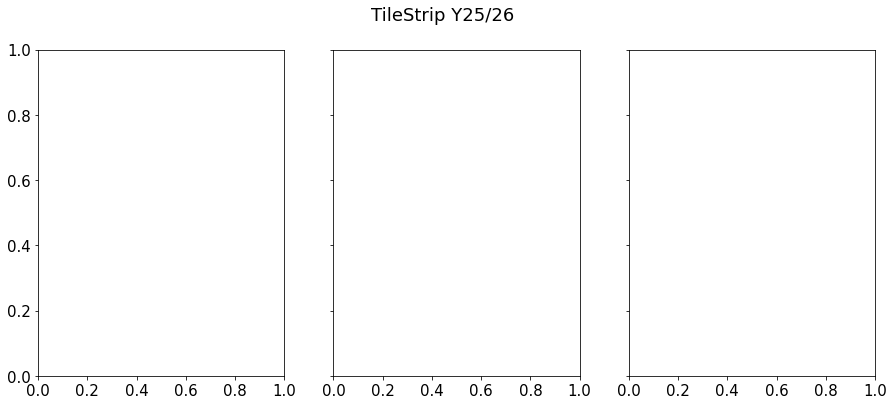

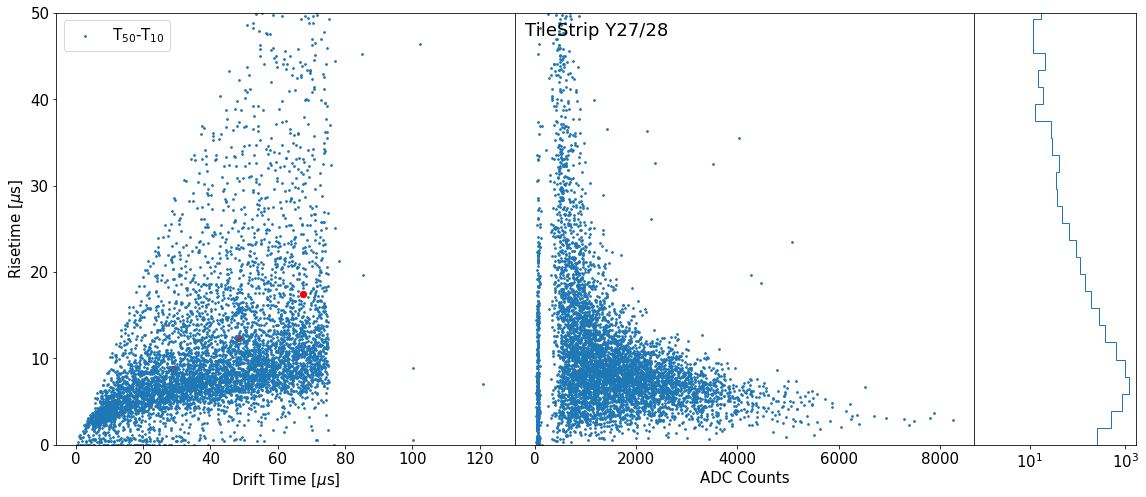

In [18]:
i = 0
bins = 50
analysis_config.GetCalibrationConstantsFromFile('/g/g90/jacopod/software/TMSAnalysis/config/30th/Calibrations_Xe_Run30.csv')
for k in df_ind.keys():
    if not (k.startswith('TileStrip') and k.endswith('Charge Energy')):
        continue
    fig,ax = plt.subplots(1,3,figsize=(15,6),sharey=True)
    ch_name = analysis_config.calibration_constants.index[i]
    ch = 'TileStrip ' + ch_name
    i += 1
    fig.suptitle(ch)
    try:
        #mask = (df_ind[ch + ' Charge Energy']>energy_min) & (df_ind[ch + ' Charge Energy']<energy_max) &\
        #((df_ind[ch + ' T50'] - df_ind[ch + ' T10'])*sampling_time<df_ind[ch + ' Drift Time'])
        mask = ((df_ind[ch + ' T50'] - df_ind[ch + ' T10'])*sampling_time<df_ind[ch + ' Drift Time'])
    except KeyError:
        continue
    rise_time10 = (df_ind[ch + ' T90'][mask] - df_ind[ch + ' T10'][mask])*sampling_time
    rise_time25 = (df_ind[ch + ' T90'][mask] - df_ind[ch + ' T25'][mask])*sampling_time
    rise_time50 = (df_ind[ch + ' T90'][mask] - df_ind[ch + ' T50'][mask])*sampling_time
    rise_time1025 = (df_ind[ch + ' T25'][mask] - df_ind[ch + ' T10'][mask])*sampling_time
    rise_time2550 = (df_ind[ch + ' T50'][mask] - df_ind[ch + ' T25'][mask])*sampling_time
    rise_time5090 = (df_ind[ch + ' T90'][mask] - df_ind[ch + ' T50'][mask])*sampling_time
    rise_time1050 = (df_ind[ch + ' T50'][mask] - df_ind[ch + ' T10'][mask])*sampling_time
    ch_drift_time = df_ind[ch + ' Drift Time'][mask]
    dt_slice = np.linspace(0,77,5)
    for j,e in enumerate(dt_slice):
        if j < (len(dt_slice)-1):
            mask_slice = (ch_drift_time>e) & (ch_drift_time<dt_slice[j+1])
            dt_val = (dt_slice[j+1]+e)/2
        ax[0].scatter(dt_val,np.mean(rise_time1050[mask_slice]),c='red')
    ax[0].set_ylim(0,50)
    #ax[0].scatter(ch_drift_time,rise_time10,s=3,alpha=1,label = 'T$_{90}$-T$_{10}$')
    #ax[0].scatter(ch_drift_time,rise_time25,s=3,alpha=1,label = 'T$_{90}$-T$_{25}$')
    #ax[0].scatter(ch_drift_time,rise_time50,s=3,alpha=1,label = 'T$_{90}$-T$_{50}$')
    ax[0].scatter(ch_drift_time,rise_time1050,s=3,alpha=1,label = 'T$_{50}$-T$_{10}$')
    ax[0].set_xlabel('Drift Time [$\mu$s]')
    ax[0].set_ylabel('Risetime [$\mu$s]')
    ax[0].set_position([0,0,0.425,1])
    #ax[1].scatter(df_ind[ch + ' Charge Energy'][mask],rise_time10,s=3,alpha=1,label = 'T$_{90}$-T$_{10}$')
    #ax[1].scatter(df_ind[ch + ' Charge Energy'][mask],rise_time25,s=3,alpha=1,label = 'T$_{90}$-T$_{25}$')
    #ax[1].scatter(df_ind[ch + ' Charge Energy'][mask],rise_time50,s=3,alpha=1,label = 'T$_{90}$-T$_{50}$')
    ax[1].scatter(df_ind[ch + ' Charge Energy'][mask],rise_time1050,s=3,alpha=1,label = 'T$_{90}$-T$_{50}$')
    ax[1].get_yaxis().set_visible(False)
    ax[1].set_xlabel('ADC Counts')
    ax[1].set_position([0.425,0,0.425,1])
    ax[2].set_position([0.85,0,0.15,1])
    #ax[2].hist(rise_time10, orientation='horizontal', bins = bins, histtype='step',log=True)
    #ax[2].hist(rise_time25, orientation='horizontal', bins = bins, histtype='step',log=True)
    #ax[2].hist(rise_time50, orientation='horizontal', bins = bins, histtype='step',log=True)
    ax[2].hist(rise_time1050, orientation='horizontal', bins = bins, histtype='step',log=True)
    ax[2].get_yaxis().set_visible(False)
    ax[0].legend()
    plt.show()

(-0.1, 12.5)

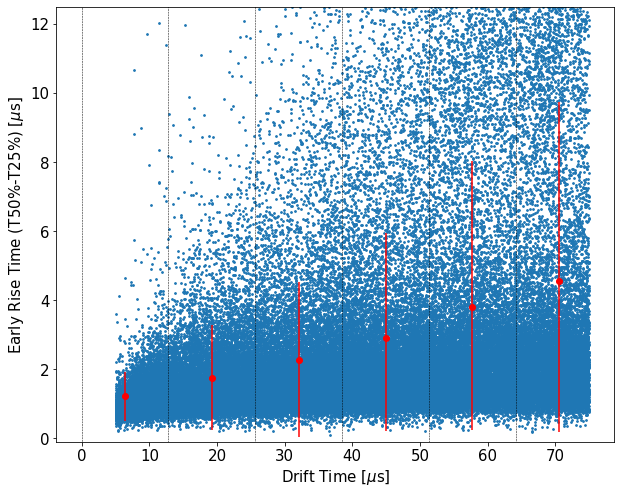

In [19]:
rise_time1050 = []
dt_channel = []
ix_list = []
for ch in analysis_config.channel_map['ChannelName'][analysis_config.channel_map['ChannelType'] == 'TileStrip']:
    #if ('-' in ch) or ('/' in ch):
    #    continue
    energy_key = 'TileStrip ' + ch + ' Charge Energy'
    rms_key = 'TileStrip ' + ch + ' Baseline RMS'
    channel_mask = (df_ind[energy_key] > 5*df_ind[rms_key]) & (df_ind['TileStrip '+ch+' T10'] > trigger_time)
    rise_time1050.append((df_ind['TileStrip '+ch+' T50'][channel_mask] - df_ind['TileStrip '+ch+' T25'][channel_mask])*\
    sampling_time)
    dt_channel.append(DriftTime_ind[channel_mask])
    ix_list.extend(df_ind[channel_mask].index)
rise_time1050 = pd.concat(rise_time1050,ignore_index=True)
dt_channel = pd.concat(dt_channel,ignore_index=True)
plt.scatter(dt_channel,rise_time1050,s=3,alpha=1,label = 'T$_{50}$-T$_{10}$')
dt_slice = np.linspace(0,77,7)
for j,e in enumerate(dt_slice):
    try:
        mask_slice = (dt_channel>e) & (dt_channel<dt_slice[j+1])
        dt_val = (dt_slice[j+1]+e)/2
    except IndexError:
        continue
    val = np.mean(rise_time1050[mask_slice])
    std = np.std(rise_time1050[mask_slice])
    if std < val:
        low_err = std
    else:
        low_err = val - min(rise_time1050[mask_slice])
    plt.vlines([e],plt.gca().get_ylim()[0],plt.gca().get_ylim()[1],linestyles='dashed',linewidths=0.5)
    plt.errorbar(dt_val,val,[[low_err],[std]],fmt='none',c='red')
    plt.scatter(dt_val,val,c='red')
plt.xlabel('Drift Time [$\mu$s]')
plt.ylabel('Early Rise Time (T50%-T25%) [$\mu$s]')
plt.ylim(-0.1,12.5)

In [20]:
ix_list = np.asarray(ix_list)
selection_index = ix_list[(rise_time1050>3.0).to_list()]

In [23]:
run_parameters_file = '/g/g90/jacopod/software/TMSAnalysis/config/30th/Run_Parameters_Run30.xlsx'
calibrations_file = '/g/g90/jacopod/software/TMSAnalysis/config/30th/Calibrations_Xe_Run30.csv'
channel_map_file = '/g/g90/jacopod/software/TMSAnalysis/config/30th/Channel_Map_Run30.xlsx'
root_folder = []
for i in selection_index[:10]:
    for root, dirs, files in os.walk('/p/lustre1/jacopod/30th/'):
        for name in files:
            if name == df_ind['File'][i]:
                root_folder.append(root)

In [25]:
for i,e in enumerate(selection_index[:10]):               
    event = Waveform.Event('/p/lustre1/jacopod/30th/selected_dataset/alpha_rich_500ns.p',\
                           'tier1_SIS3316Raw_20200916140513_SiPMs_longTPC_sbias32p5_internalTrigger1500ADC_cath_5978V_1-ngm.root',\
                           5,\
                           run_parameters_file,\
                           calibrations_file,\
                           channel_map_file)

    #event.smooth(0.5)
    plot = event.plot_event(True)
    plot.show()

IndexError: list index out of range

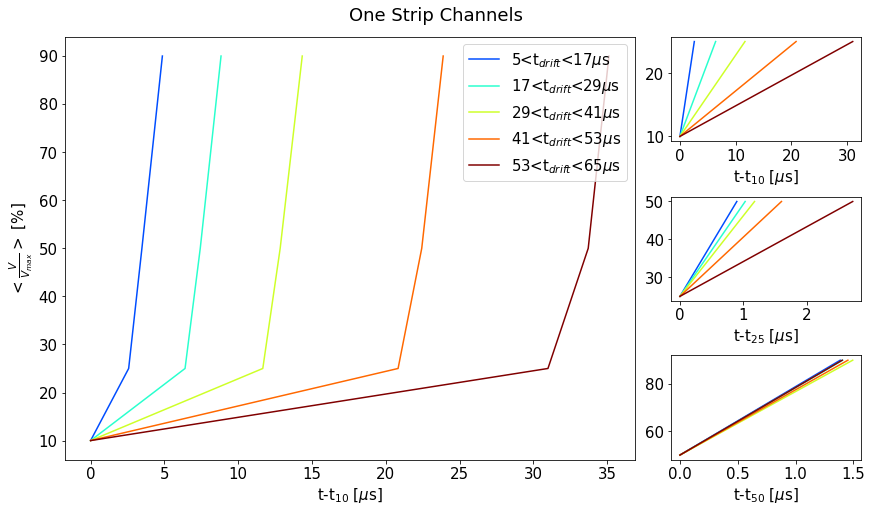

In [12]:
rise_time1025 = []
rise_time2550 = []
rise_time5090 = []
ix_list = []
for ch in analysis_config.channel_map['ChannelName'][analysis_config.channel_map['ChannelType'] == 'TileStrip']:
    if ('-' in ch) or ('/' in ch):
    #if '-' in ch:
        continue
    energy_key = 'TileStrip ' + ch + ' Charge Energy'
    rms_key = 'TileStrip ' + ch + ' Baseline RMS'
    channel_mask = (df_ind[energy_key] > 5*df_ind[rms_key]) &\
    (df_ind['TileStrip '+ch+' T10'] > trigger_time) &\
    (df_ind[energy_key]>0.5)
    rise_time1025.append((df_ind['TileStrip '+ch+' T25'][channel_mask] - df_ind['TileStrip '+ch+' T10'][channel_mask])*\
    sampling_time)
    rise_time2550.append((df_ind['TileStrip '+ch+' T50'][channel_mask] - df_ind['TileStrip '+ch+' T25'][channel_mask])*\
    sampling_time)
    rise_time5090.append((df_ind['TileStrip '+ch+' T90'][channel_mask] - df_ind['TileStrip '+ch+' T50'][channel_mask])*\
    sampling_time)
    ix_list.extend(df_ind[channel_mask].index)
rise_time1025 = pd.concat(rise_time1025,ignore_index=True)
rise_time2550 = pd.concat(rise_time2550,ignore_index=True)
rise_time5090 = pd.concat(rise_time5090,ignore_index=True)

t_slice = 6
drift_range = np.linspace(5,65,t_slice)
fig3 = plt.figure(constrained_layout=True,figsize=(12,7))
gs = fig3.add_gridspec(3, 4)
f3_ax0 = fig3.add_subplot(gs[:, :-1])
f3_ax1 = fig3.add_subplot(gs[0, -1])
f3_ax2 = fig3.add_subplot(gs[1, -1])
f3_ax3 = fig3.add_subplot(gs[2, -1])
colors = plt.cm.jet(np.linspace(0,1,t_slice))
for j,dr in enumerate(drift_range):
    if j == 0:
        continue
    time_slice = np.logical_and(DriftTime_ind[ix_list]>drift_range[j-1],DriftTime_ind[ix_list]<dr)
    y_val = [10.0,25.0,50.0,90.0]
    x_val = [0]
    for v in (rise_time1025[time_slice.to_list()],\
              rise_time2550[time_slice.to_list()],\
              rise_time5090[time_slice.to_list()]):
        x_val.append(np.mean(v))
    f3_ax0.plot(np.cumsum(x_val),y_val,label='{:.0f}<t$_{{drift}}$<{:.0f}$\mu$s'.format(drift_range[j-1],dr),c=colors[j])
    f3_ax1.plot([0,x_val[1]],[10.0,25.0],c=colors[j])
    f3_ax2.plot([0,x_val[2]],[25.0,50.0],c=colors[j])
    f3_ax3.plot([0,x_val[3]],[50.0,90.0],c=colors[j])
f3_ax0.set_xlabel('t-t$_{10}$ [$\mu$s]')
f3_ax1.set_xlabel('t-t$_{10}$ [$\mu$s]')
f3_ax2.set_xlabel('t-t$_{25}$ [$\mu$s]')
f3_ax3.set_xlabel('t-t$_{50}$ [$\mu$s]')
f3_ax0.set_ylabel(r'$<\frac{V}{V_{max}}>$ [%]')
f3_ax0.legend()
fig3.suptitle('One Strip Channels')
plt.show()

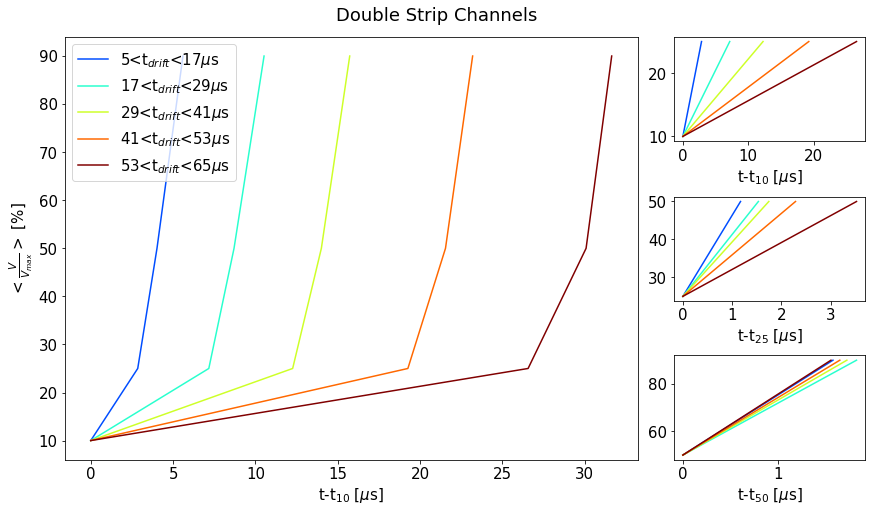

In [14]:
rise_time1025 = []
rise_time2550 = []
rise_time5090 = []
ix_list = []
for ch in analysis_config.channel_map['ChannelName'][analysis_config.channel_map['ChannelType'] == 'TileStrip']:
    #if ('-' in ch) or ('/' in ch):
    if not '/' in ch:
        continue
    energy_key = 'TileStrip ' + ch + ' Charge Energy'
    rms_key = 'TileStrip ' + ch + ' Baseline RMS'
    channel_mask = (df_ind[energy_key] > 5*df_ind[rms_key]) &\
    (df_ind['TileStrip '+ch+' T10'] > trigger_time) &\
    (df_ind[energy_key]>0.5)
    rise_time1025.append((df_ind['TileStrip '+ch+' T25'][channel_mask] - df_ind['TileStrip '+ch+' T10'][channel_mask])*\
    sampling_time)
    rise_time2550.append((df_ind['TileStrip '+ch+' T50'][channel_mask] - df_ind['TileStrip '+ch+' T25'][channel_mask])*\
    sampling_time)
    rise_time5090.append((df_ind['TileStrip '+ch+' T90'][channel_mask] - df_ind['TileStrip '+ch+' T50'][channel_mask])*\
    sampling_time)
    ix_list.extend(df_ind[channel_mask].index)
rise_time1025 = pd.concat(rise_time1025,ignore_index=True)
rise_time2550 = pd.concat(rise_time2550,ignore_index=True)
rise_time5090 = pd.concat(rise_time5090,ignore_index=True)

t_slice = 6
drift_range = np.linspace(5,65,t_slice)
fig3 = plt.figure(constrained_layout=True,figsize=(12,7))
gs = fig3.add_gridspec(3, 4)
f3_ax0 = fig3.add_subplot(gs[:, :-1])
f3_ax1 = fig3.add_subplot(gs[0, -1])
f3_ax2 = fig3.add_subplot(gs[1, -1])
f3_ax3 = fig3.add_subplot(gs[2, -1])
colors = plt.cm.jet(np.linspace(0,1,t_slice))
for j,dr in enumerate(drift_range):
    if j == 0:
        continue
    time_slice = np.logical_and(DriftTime_ind[ix_list]>drift_range[j-1],DriftTime_ind[ix_list]<dr)
    y_val = [10.0,25.0,50.0,90.0]
    x_val = [0]
    for v in (rise_time1025[time_slice.to_list()],\
              rise_time2550[time_slice.to_list()],\
              rise_time5090[time_slice.to_list()]):
        x_val.append(np.mean(v))
    f3_ax0.plot(np.cumsum(x_val),y_val,label='{:.0f}<t$_{{drift}}$<{:.0f}$\mu$s'.format(drift_range[j-1],dr),c=colors[j])
    f3_ax1.plot([0,x_val[1]],[10.0,25.0],c=colors[j])
    f3_ax2.plot([0,x_val[2]],[25.0,50.0],c=colors[j])
    f3_ax3.plot([0,x_val[3]],[50.0,90.0],c=colors[j])
f3_ax0.set_xlabel('t-t$_{10}$ [$\mu$s]')
f3_ax1.set_xlabel('t-t$_{10}$ [$\mu$s]')
f3_ax2.set_xlabel('t-t$_{25}$ [$\mu$s]')
f3_ax3.set_xlabel('t-t$_{50}$ [$\mu$s]')
f3_ax0.set_ylabel(r'$<\frac{V}{V_{max}}>$ [%]')
f3_ax0.legend()
fig3.suptitle('Double Strip Channels')
plt.show()